In [1]:
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


# using linear interpolation for forecasting

In [2]:
file = r'C:\Users\Sidharth\Desktop\798Q\.ipynb_checkpoints\data.csv.csv'
df=pd.read_csv(file,index_col=0)

In [3]:
data=df.copy()

In [4]:
data=data[:-3]
data

,From,to,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
Sn,,,,,,,,,,,,
1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1


In [5]:
 data.drop(['to'], axis=1, inplace=True)

In [6]:
data.columns


Index(['From', 'pm10', 'pm2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3',
       'Ozone', 'Benzene'],
      dtype='object')

In [7]:
data['From'] = pd.to_datetime(data['From'], format = '%d-%m-%Y %H:%M')

In [8]:
data['From']

Sn
1      2023-02-01 00:00:00
2      2023-02-01 00:15:00
3      2023-02-01 00:30:00
4      2023-02-01 00:45:00
5      2023-02-01 01:00:00
               ...        
8636   2023-05-01 22:45:00
8637   2023-05-01 23:00:00
8638   2023-05-01 23:15:00
8639   2023-05-01 23:30:00
8640   2023-05-01 23:45:00
Name: From, Length: 8640, dtype: datetime64[ns]

In [9]:
data.set_index(['From'], inplace=True)

In [10]:
data_interp_linear=data.copy()
data_interp_cubic=data.copy()
data_interp_spline=data.copy()

In [11]:

# Perform linear interpolation on the DataFrame
data_interp_linear = data_interp_linear.interpolate(limit_direction='both',method='linear')

# Print the interpolated DataFrame
print(data_interp_linear)

                      pm10  pm2.5    NO    NO2   NOX    CO   SO2   NH3  Ozone  \
From                                                                            
2023-02-01 00:00:00   95.0   35.0  18.1   90.1  56.2  0.31   8.2  17.7   28.1   
2023-02-01 00:15:00   95.0   35.0  18.1   88.0  55.1  0.33   8.2  18.3   27.1   
2023-02-01 00:30:00   95.0   35.0  18.1   87.7  55.2  0.38   8.2  19.7   24.9   
2023-02-01 00:45:00  122.0   34.0  18.1   88.9  55.7  0.38   8.2  21.3   21.9   
2023-02-01 01:00:00  122.0   34.0  18.1   90.0  55.8  0.38   8.2  22.3   16.7   
...                    ...    ...   ...    ...   ...   ...   ...   ...    ...   
2023-05-01 22:45:00   19.0   11.0  17.9  100.0  67.8  0.63  10.0  10.7   26.1   
2023-05-01 23:00:00   19.0   11.0  17.9  100.0  67.7  0.57  10.0  10.4   30.9   
2023-05-01 23:15:00   19.0   11.0  19.6  100.2  69.2  0.58   9.9  10.5   29.6   
2023-05-01 23:30:00   19.0   11.0  20.8  100.2  70.2  0.58   9.5  10.8   30.0   
2023-05-01 23:45:00   32.0  

<Axes: xlabel='From'>

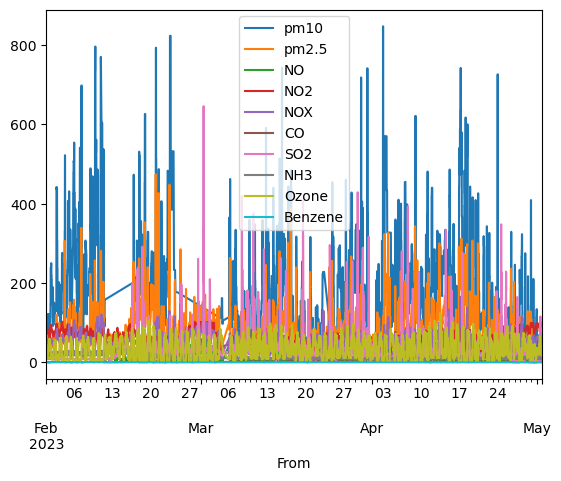

In [12]:
data_interp_linear.plot()

When comparing the methods of replacing NA values with 0 and using linear interpolation, there are some key differences to consider.

Replacing NA values with 0 assigns a fixed value of 0 to all the missing values. This approach assumes that the missing values have no specific pattern or trend and treats them as equal to zero. It is a simple and straightforward method, but it may not accurately capture the underlying trends or patterns in the data. This can lead to inaccurate analysis or modeling results, especially if the missing values are not randomly distributed.

On the other hand, linear interpolation estimates the missing values based on the surrounding data points. It assumes a linear relationship between the available data points and fills in the missing values accordingly. Linear interpolation takes into account the trend or pattern in the data and provides a smoother estimation compared to simply replacing with 0. It can be a more accurate method, especially when the missing values follow a linear trend.

In summary, linear interpolation tends to provide a more accurate estimation of missing values compared to replacing with 0. It takes into account the trend or pattern in the data and provides a smoother estimate. However, the choice between the two methods ultimately depends on the nature of the data and the specific analysis or modeling objectives.

In [13]:
data_interp_linear=data_interp_linear.resample('D').mean()

NO_C = data_interp_linear['NO']
NO2_C = data_interp_linear['NO2']
NOX_C = data_interp_linear['NOX']
CO_C = data_interp_linear['CO']
SO2_C = data_interp_linear['SO2']
NH3_C = data_interp_linear['NH3']
Ozone_C= data_interp_linear['Ozone']
Benzene_c = data_interp_linear['Benzene']
pm10_C = data_interp_linear['pm10']
pm25_C = data_interp_linear['pm2.5']

In [14]:
data_interp_linear=data_interp_linear.resample('D').mean()
data_interp_linear

,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
From,,,,,,,,,,
2023-02-01,114.739583,35.145833,18.100000,78.850000,48.514583,0.453490,8.200000,22.130208,32.283333,0.232292
2023-02-02,177.458333,52.020833,18.100000,79.049479,53.559896,1.312344,8.200000,22.416667,25.863542,0.119792
2023-02-03,171.270833,52.916667,18.100000,82.247396,56.590104,1.219896,8.200000,23.208333,27.738542,0.165625
2023-02-04,214.239583,70.703125,18.100000,76.579687,53.282812,1.135365,8.200000,25.262500,27.595833,0.182292
2023-02-05,262.171875,81.437500,18.100000,73.644271,63.118750,0.833542,8.200000,26.077083,24.040104,0.200000
...,...,...,...,...,...,...,...,...,...,...
2023-04-27,65.645833,29.031250,7.333333,72.735937,44.648438,0.397083,25.185937,10.814583,48.041667,0.100000
2023-04-28,123.281250,48.572917,22.408854,78.778125,60.115625,1.330521,21.163542,11.039583,40.788542,0.100000
2023-04-29,72.458333,34.479167,6.615104,81.954167,48.966146,0.712917,23.288542,10.872917,41.401042,0.100000


In [15]:
training = data_interp_linear.index[75]
msk= (data_interp_linear.index <= training)
data_train = data_interp_linear[msk].copy()
data_test = data_interp_linear[~msk].copy()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

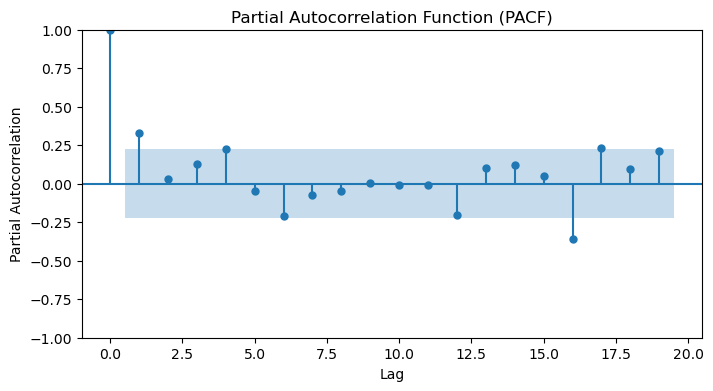

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(data_train['Ozone'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Function (PACF)')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

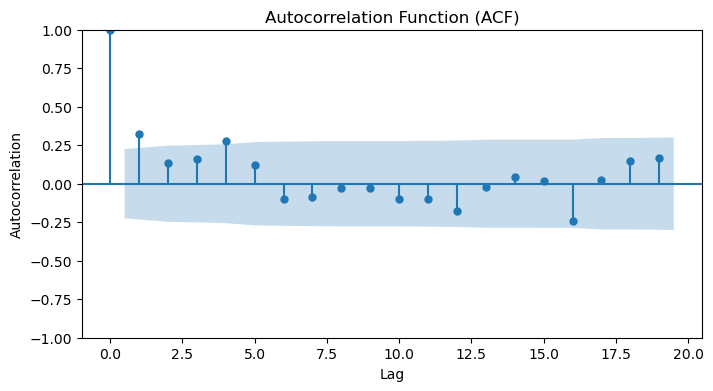

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(data_train['Ozone'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function (ACF)')

In [18]:
plt.show()

In [19]:
#Ozone_CC=Ozone_C[1:7540]

# Perform ADF test
result = adfuller(data_train['Ozone'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -6.07024657774616
p-value: 1.1554855941496654e-07


In [20]:
from pmdarima import auto_arima


In [21]:
from pmdarima.arima import auto_arima
def arimamodel(timeseries) :
 autoarima_model = auto_arima(timeseries, start_p=0, start_q=0, d=0, max_p=5, max_q=2)
 return autoarima_model
model = arimamodel(data_train['Ozone'])
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -257.522
Date:                Wed, 28 Jun 2023   AIC                            521.043
Time:                        21:20:51   BIC                            528.036
Sample:                    02-01-2023   HQIC                           523.838
                         - 04-17-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.9378      4.038      5.681      0.000      15.024      30.852
ar.L1          0.3258      0.116      2.818      0.005       0.099       0.552
sigma2        51.2887      9.055      5.664      0.000      33.541      69.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.95   Prob(JB):                         0.49
Heteroskedasticity (H):               1.11   Skew:                             0.30
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
auto = model.predict(n_periods = len(data_test['Ozone']))
data_interp_linear['Ozone forecast'] = [None]*len(data_train['Ozone']) + list(auto)


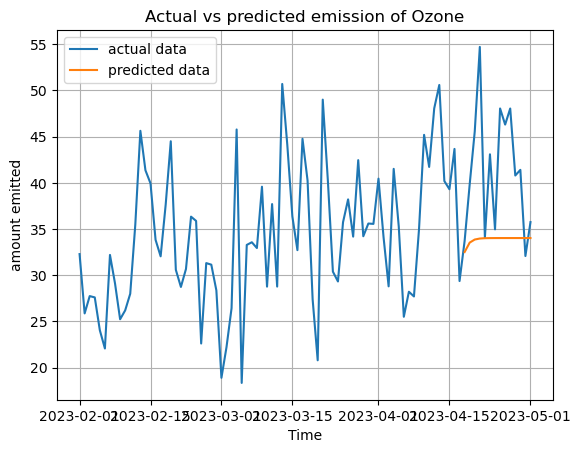

In [23]:
 %matplotlib inline

#matplotlib notebook
plt.plot(data_interp_linear['Ozone'],label='actual data')
plt.plot(data_interp_linear['Ozone forecast'], label='predicted data')
plt.xlabel('Time')
plt.ylabel('amount emitted')
plt.title('Actual vs predicted emission of Ozone')
plt.grid()
plt.legend()
plt.show()



In [24]:
ape = np.abs((data_test['Ozone'] - data_interp_linear['Ozone forecast']) / data_test['Ozone'])
mape = np.mean(ape) * 100

print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 16.9347932207782


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

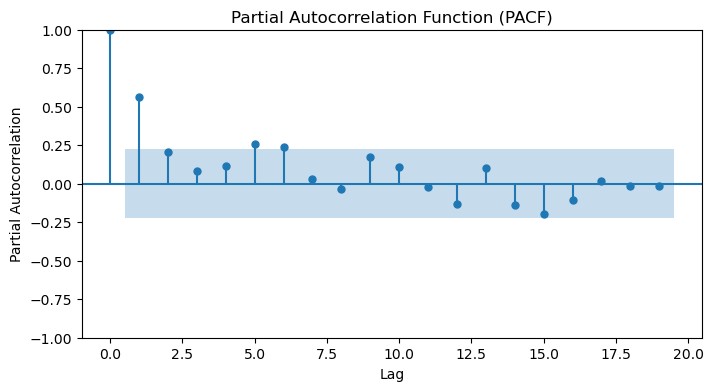

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(data_train['CO'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Function (PACF)')

In [26]:
# Perform ADF test
result = adfuller(data_train['CO'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -2.858367800614889
p-value: 0.050407868184930885


In [27]:
from pmdarima.arima import auto_arima
def arimamodel(timeseries) :
 autoarima_model = auto_arima(timeseries, start_p=0, start_q=0, d=0, max_p=5, max_q=2)
 return autoarima_model
model = arimamodel(data_train['CO'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 -26.149
Date:                Wed, 28 Jun 2023   AIC                             62.299
Time:                        21:20:53   BIC                             73.952
Sample:                    02-01-2023   HQIC                            66.956
                         - 04-17-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0285      0.042      0.674      0.500      -0.054       0.111
ar.L1          1.2071      0.166      7.284      0.000       0.882       1.532
ar.L2         -0.2276      0.153     -1.485      0.138      -0.528       0.073
ma.L1         -0.8209      0.126     -6.490      0.000      -1.069      -0.573
sigma2         0.1150      0.024      4.879      0.000       0.069       0.161
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.73   Prob(JB):                         0.48
Heteroskedasticity (H):               0.81   Skew:                            -0.05
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
auto = model.predict(n_periods = len(data_test['CO']))
data_interp_linear['CO forecast'] = [None]*len(data_train['CO']) + list(auto)

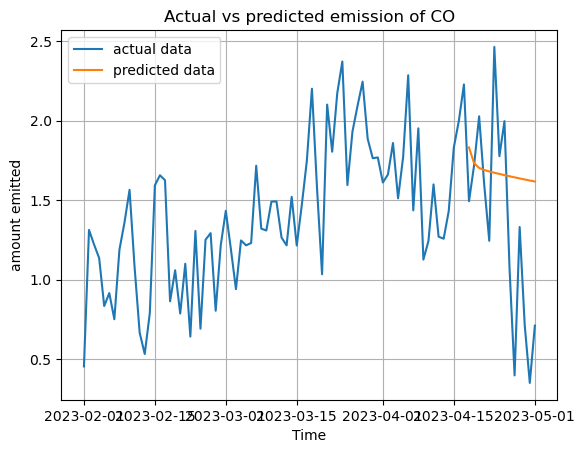

In [29]:
 %matplotlib inline

#matplotlib notebook
plt.plot(CO_C,label='actual data')
plt.plot(data_interp_linear['CO forecast'], label='predicted data')
plt.xlabel('Time')
plt.ylabel('amount emitted')
plt.title('Actual vs predicted emission of CO')
plt.grid()
plt.legend()
plt.show()

# cubic interpolation

In [30]:


# Forward fill missing values from start
data_interp_cubic= data_interp_cubic.interpolate(limit_direction='both')


# Perform cubic interpolation for remaining NaN values
data_interp_cubic= data_interp_cubic.interpolate(method='cubic')

# Print the interpolated DataFrame
print(data_interp_cubic)

                      pm10  pm2.5    NO    NO2   NOX    CO   SO2   NH3  Ozone  \
From                                                                            
2023-02-01 00:00:00   95.0   35.0  18.1   90.1  56.2  0.31   8.2  17.7   28.1   
2023-02-01 00:15:00   95.0   35.0  18.1   88.0  55.1  0.33   8.2  18.3   27.1   
2023-02-01 00:30:00   95.0   35.0  18.1   87.7  55.2  0.38   8.2  19.7   24.9   
2023-02-01 00:45:00  122.0   34.0  18.1   88.9  55.7  0.38   8.2  21.3   21.9   
2023-02-01 01:00:00  122.0   34.0  18.1   90.0  55.8  0.38   8.2  22.3   16.7   
...                    ...    ...   ...    ...   ...   ...   ...   ...    ...   
2023-05-01 22:45:00   19.0   11.0  17.9  100.0  67.8  0.63  10.0  10.7   26.1   
2023-05-01 23:00:00   19.0   11.0  17.9  100.0  67.7  0.57  10.0  10.4   30.9   
2023-05-01 23:15:00   19.0   11.0  19.6  100.2  69.2  0.58   9.9  10.5   29.6   
2023-05-01 23:30:00   19.0   11.0  20.8  100.2  70.2  0.58   9.5  10.8   30.0   
2023-05-01 23:45:00   32.0  

<Axes: xlabel='From'>

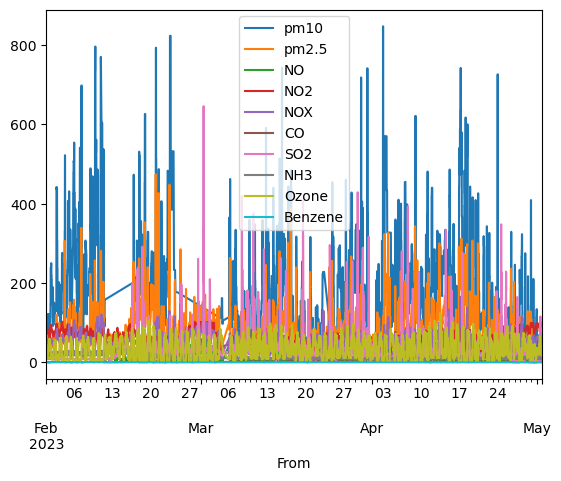

In [31]:
data_interp_cubic.plot()

## spline interpolation


In [32]:
data_interp_spline= data_interp_spline.interpolate(limit_direction='both')
data_interp_spline = data_interp_spline.interpolate(method='spline', order=3)

# Print the interpolated DataFrame
print(data_interp_spline)

                      pm10  pm2.5    NO    NO2   NOX    CO   SO2   NH3  Ozone  \
From                                                                            
2023-02-01 00:00:00   95.0   35.0  18.1   90.1  56.2  0.31   8.2  17.7   28.1   
2023-02-01 00:15:00   95.0   35.0  18.1   88.0  55.1  0.33   8.2  18.3   27.1   
2023-02-01 00:30:00   95.0   35.0  18.1   87.7  55.2  0.38   8.2  19.7   24.9   
2023-02-01 00:45:00  122.0   34.0  18.1   88.9  55.7  0.38   8.2  21.3   21.9   
2023-02-01 01:00:00  122.0   34.0  18.1   90.0  55.8  0.38   8.2  22.3   16.7   
...                    ...    ...   ...    ...   ...   ...   ...   ...    ...   
2023-05-01 22:45:00   19.0   11.0  17.9  100.0  67.8  0.63  10.0  10.7   26.1   
2023-05-01 23:00:00   19.0   11.0  17.9  100.0  67.7  0.57  10.0  10.4   30.9   
2023-05-01 23:15:00   19.0   11.0  19.6  100.2  69.2  0.58   9.9  10.5   29.6   
2023-05-01 23:30:00   19.0   11.0  20.8  100.2  70.2  0.58   9.5  10.8   30.0   
2023-05-01 23:45:00   32.0  

<Axes: xlabel='From'>

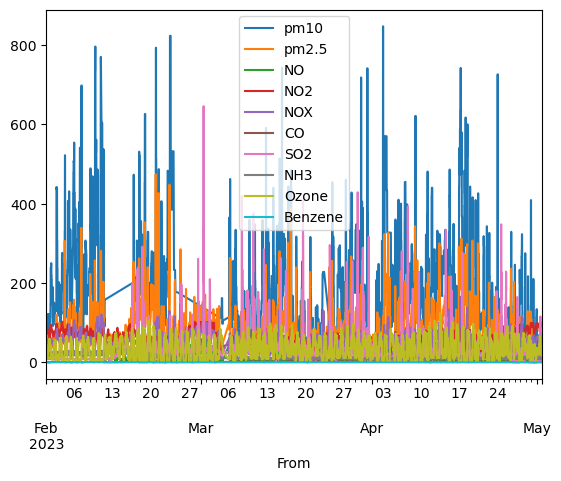

In [33]:
data_interp_spline.plot()

## comparision of all three interpolation

The plot displays the results of three interpolation methods: Linear, Cubic, and Spline interpolation. Each method offers a different approach to estimating values between data points.

Linear Interpolation: Linear interpolation provides a simple and straightforward estimation by connecting two adjacent data points with a straight line. It assumes a constant rate of change between points.

Cubic Interpolation: Cubic interpolation offers a more accurate estimation by using cubic polynomials to approximate the shape of the curve between data points. It provides a smoother interpolation compared to linear interpolation and captures more intricate patterns.

Spline Interpolation: Spline interpolation is a flexible method that utilizes piecewise-defined polynomials to create a smooth curve passing through each data point. It can capture complex and nonlinear patterns more effectively.

Analyzing the plot, we can observe that the cubic and linear interpolation curves are relatively similar, indicating that the cubic interpolation does not significantly deviate from the linear approximation in this case. However, the spline interpolation curve stands out as it differs significantly from the other two curves. The spline interpolation captures more intricate details and exhibits a smoother overall trend.

Based on this analysis, we can conclude that spline interpolation appears to be a better choice for this specific dataset and analysis. It provides a more accurate representation of the underlying pattern, capturing more nuanced variations between data points. However, the choice of interpolation method ultimately depends on the specific characteristics of the data and the desired level of accuracy or smoothness required for the analysis.

<IPython.core.display.Javascript object>


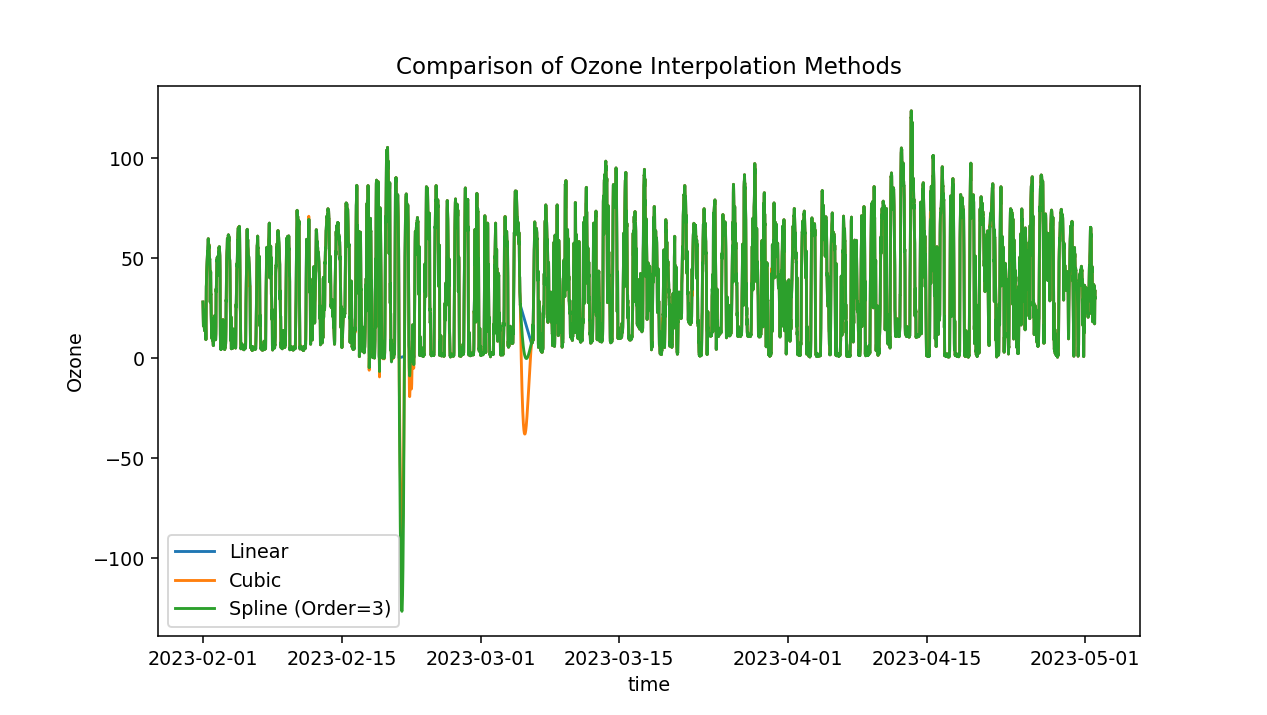

In [34]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'Ozone'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

### NO

<IPython.core.display.Javascript object>


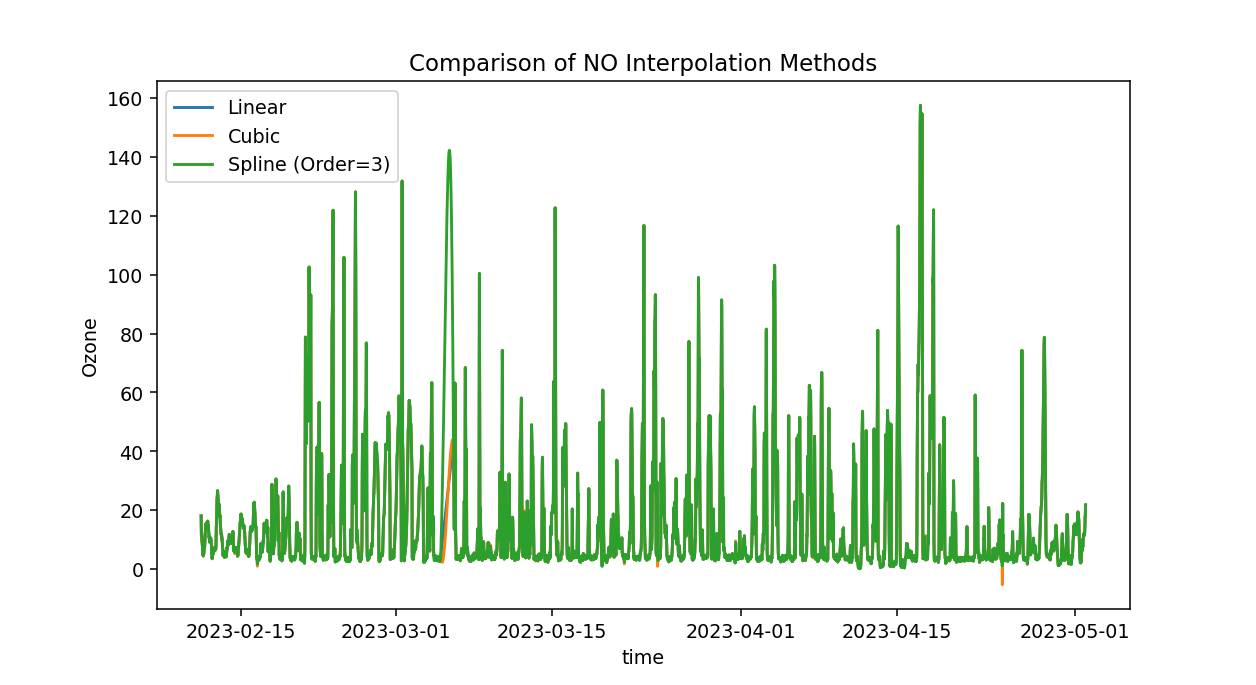

In [35]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'NO'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

### co

<IPython.core.display.Javascript object>


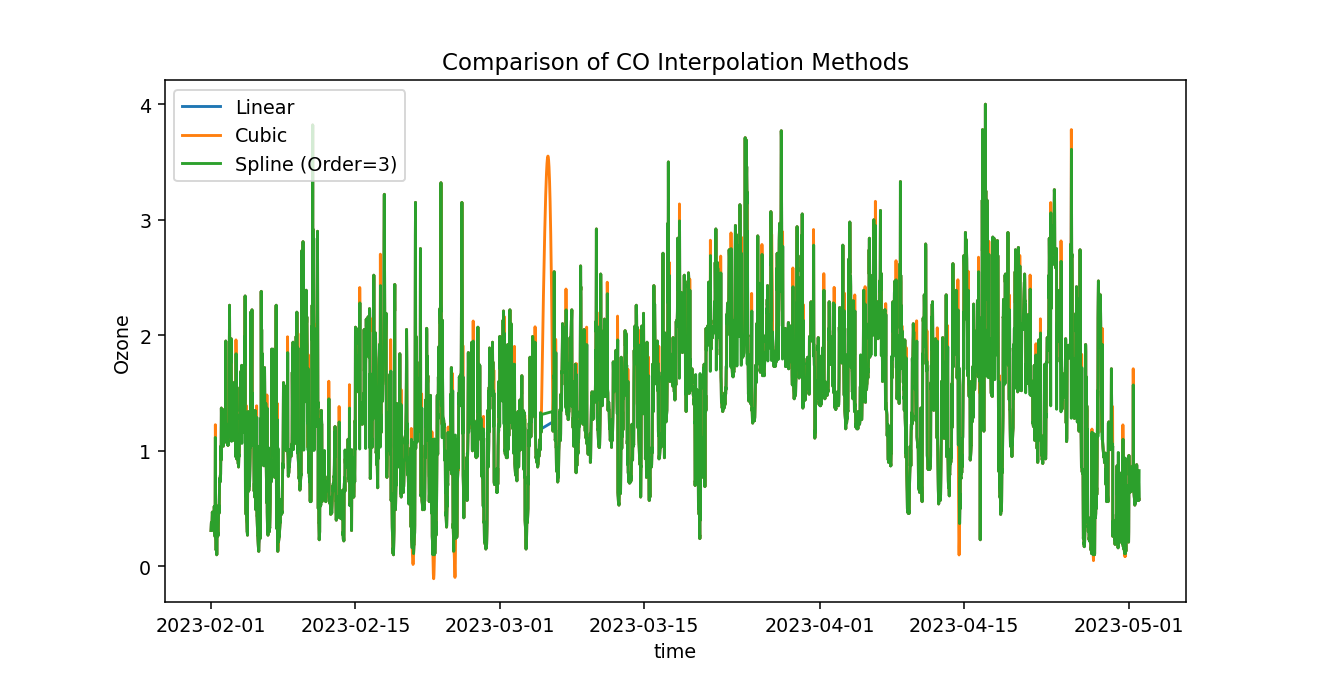

In [36]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'CO'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

#### SO2

<IPython.core.display.Javascript object>


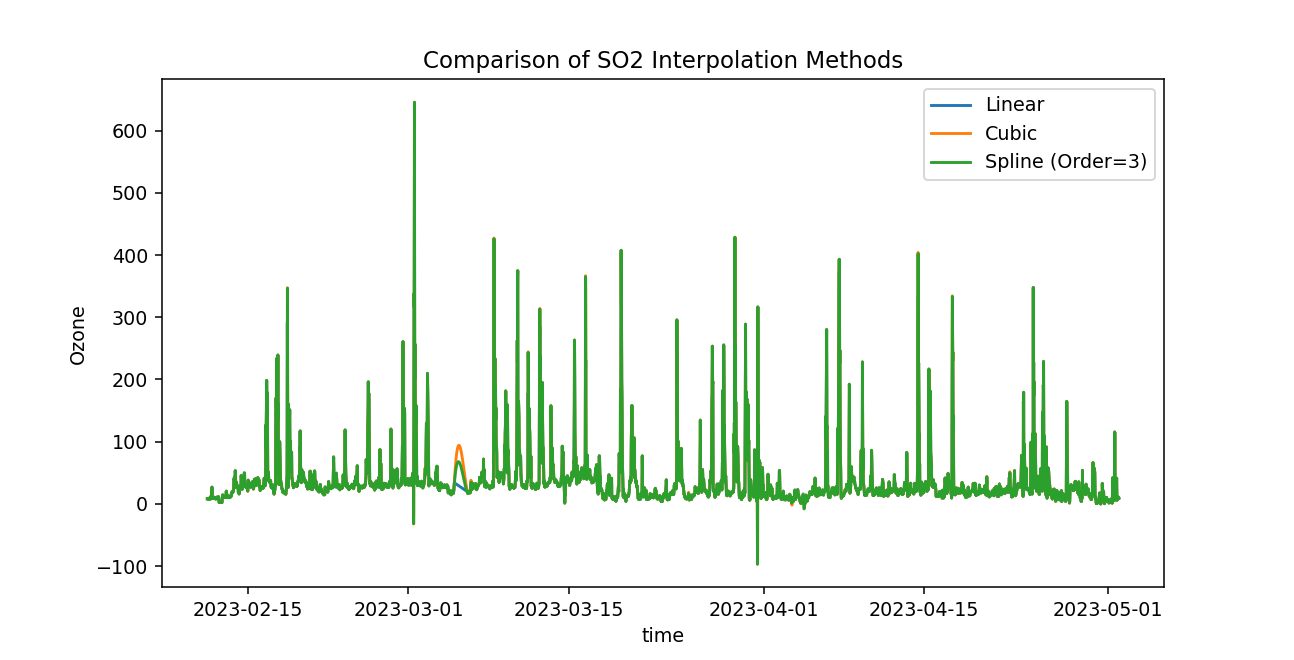

In [37]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'SO2'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

### pm10

<IPython.core.display.Javascript object>


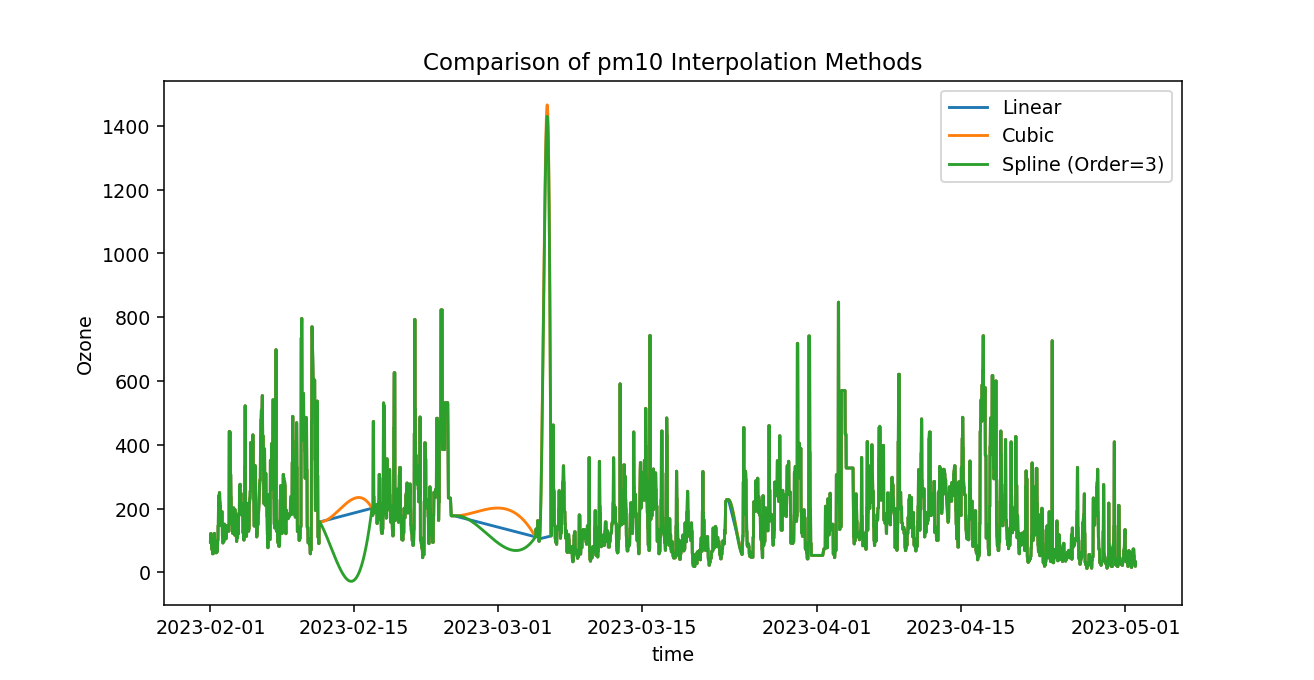

In [38]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'pm10'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

### pm2.5

<IPython.core.display.Javascript object>


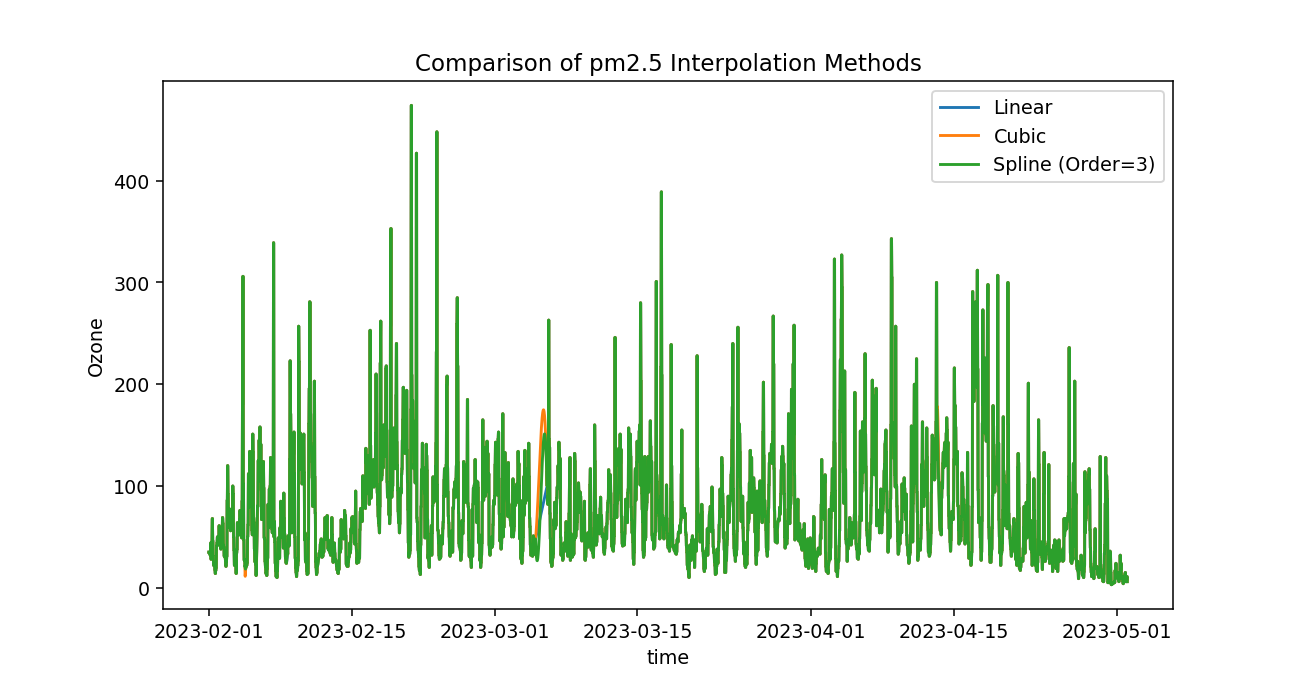

In [39]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'pm2.5'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

#### NO2

<IPython.core.display.Javascript object>


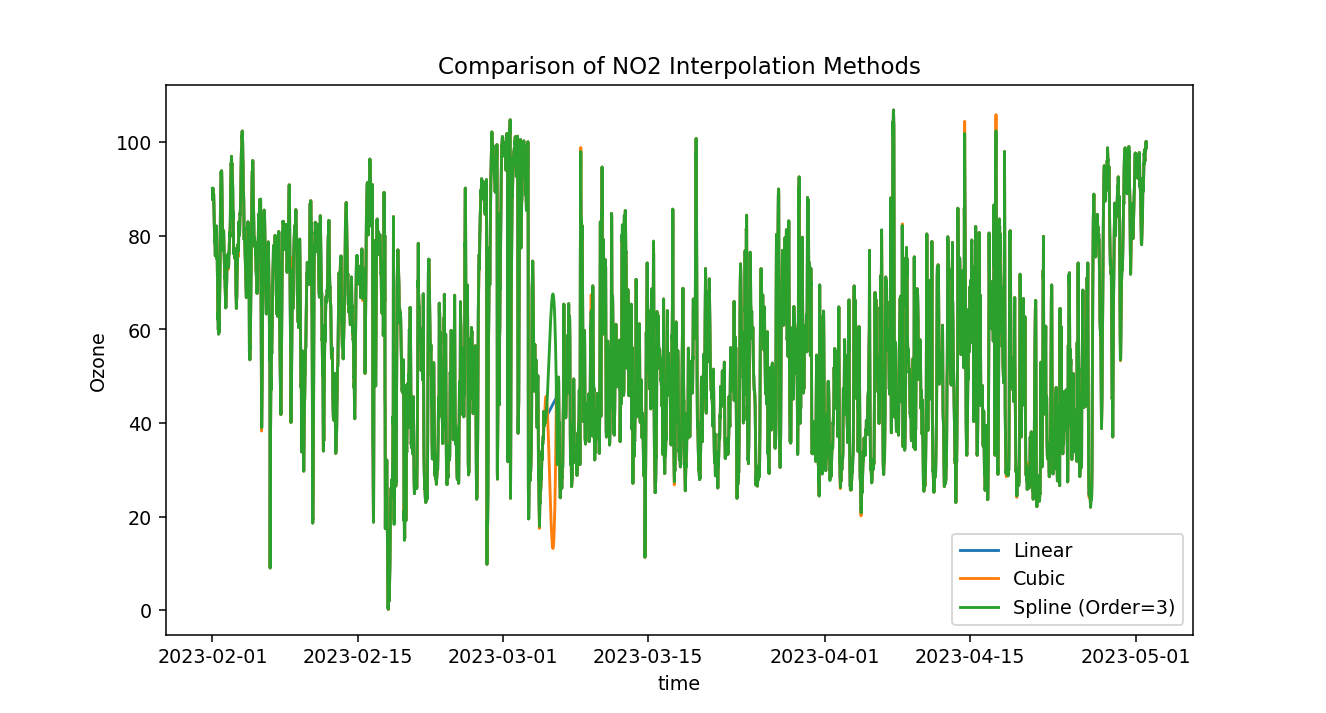

In [40]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'NO2'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

#### benzene

<IPython.core.display.Javascript object>


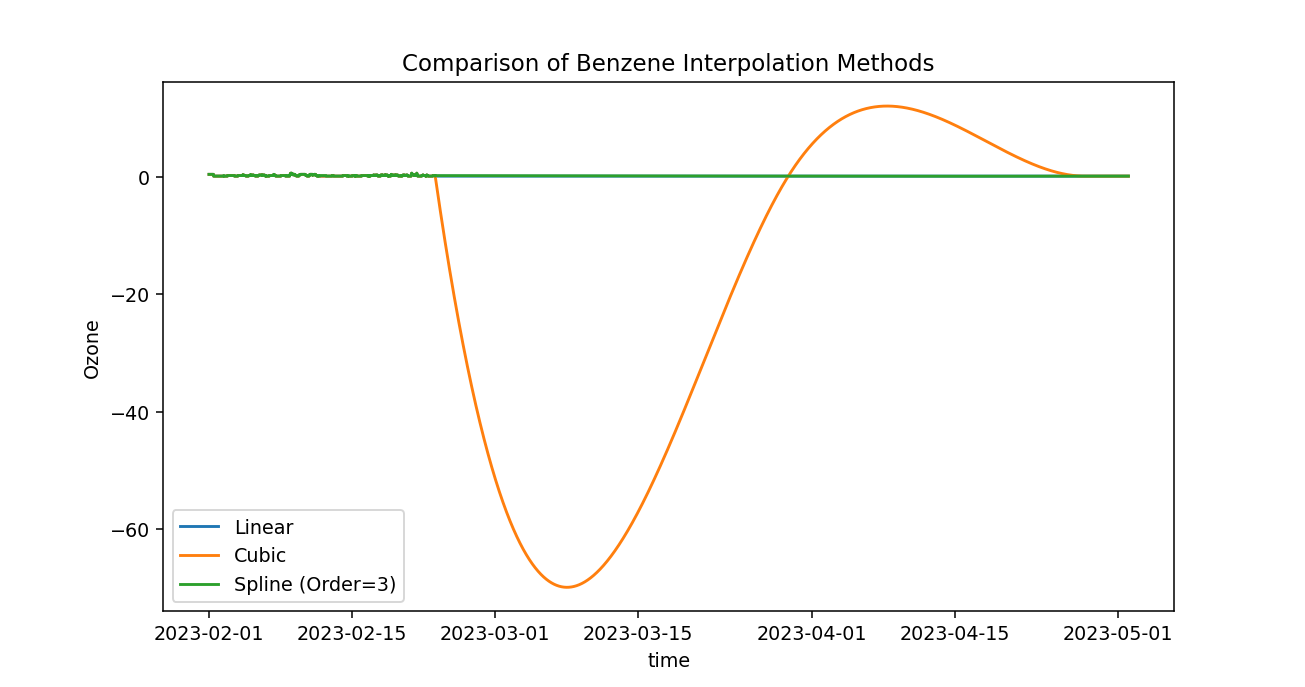

In [41]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'Benzene'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

##### NH3

<IPython.core.display.Javascript object>


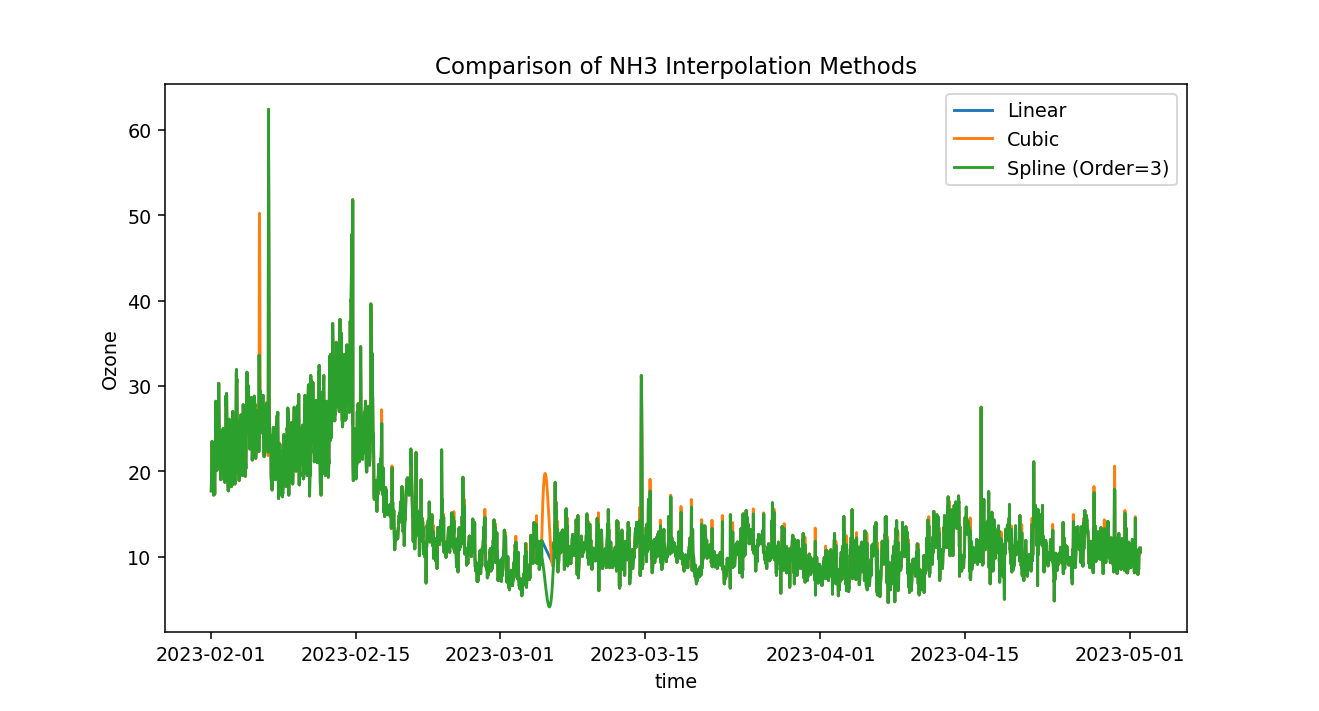

In [42]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'NH3'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()

##### NOX

<IPython.core.display.Javascript object>


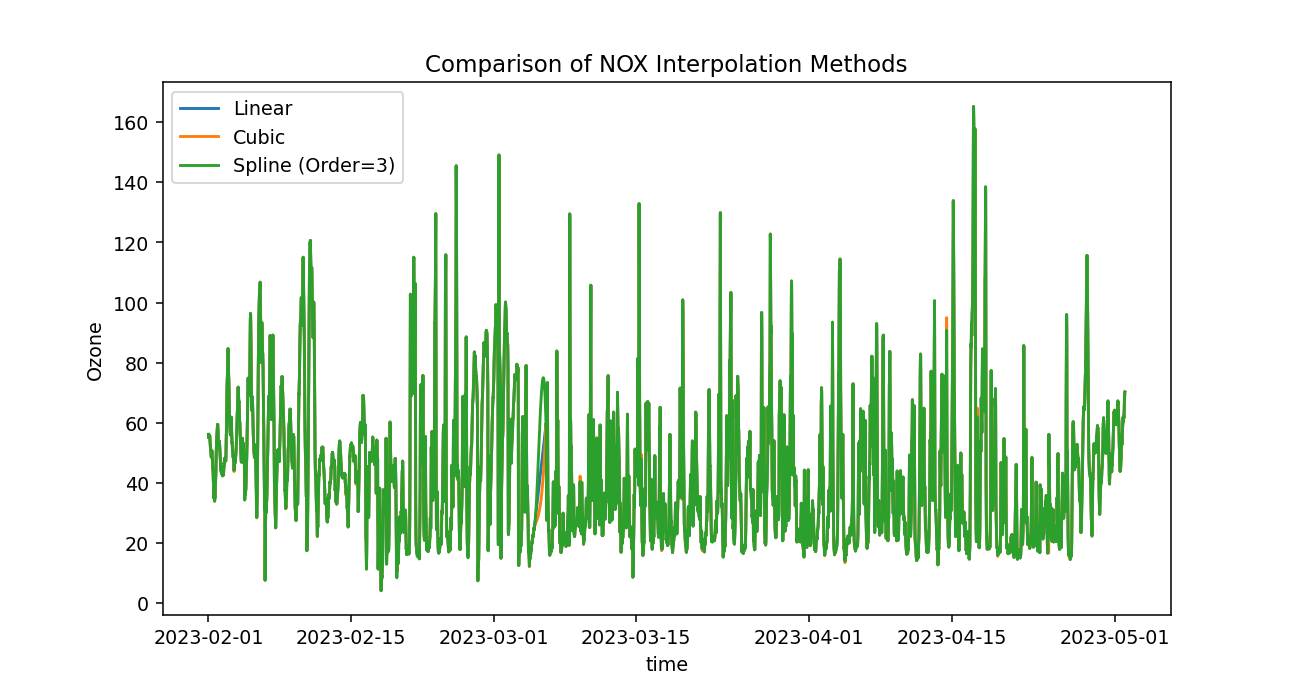

In [43]:
%matplotlib notebook

# Define the column to compare
column_to_compare = 'NOX'

# Perform linear interpolation
linear_interpolated = data[column_to_compare].interpolate(method='linear')

# Perform cubic interpolation
cubic_interpolated = data[column_to_compare].interpolate(method='cubic')

# Perform spline interpolation
spline_interpolated = data[column_to_compare].interpolate(method='spline', order=3)

# Initialize a figure and axis
fig, ax = plt.subplots()

# Plot the original data
#ax.plot(data.index, data[column_to_compare], label='Original')

# Plot the linear interpolated values
ax.plot(data.index, linear_interpolated, label='Linear')

# Plot the cubic interpolated values
ax.plot(data.index, cubic_interpolated, label='Cubic')

# Plot the spline interpolated values
ax.plot(data.index, spline_interpolated, label='Spline (Order=3)')

# Set labels and title
ax.set_xlabel('time')
ax.set_ylabel('Ozone')
ax.set_title(f'Comparison of {column_to_compare} Interpolation Methods')

# Add legend
ax.legend()

# Show the plot
plt.show()